In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
class Neural_network:

    def train(self,alpha=0.01,max_iters=1000,s1=50):
        # train initializes max_iters and size of the hidden layer
        self.max_iters = max_iters
        self.s1 = s1
        self.alpha = alpha
        # cost_values and iterations to kepp track of cost function during gradient descent
        self.cost_values = []
        self.iterations = []

    def sigmoid(self, x):
        # sigmoid takes z as argument and returns sigmoid value of x.
        return 1/(1 + np.exp(-1*x))

    def normalize(self, x):
        # normalizes x to prevent overflow.
        (m,n) = np.shape(x)
        for i in range(n):
            x[:, i] = (x[:, i] - np.mean(x[:, i])) / (np.std(x[:, i]) + np.exp(-5))
        return x

    def fit(self, x, y, k):
        # takes feature's array and target array to feed neural network.
        self.x = self.normalize(x)  # Normalizing.
        ones = np.full((x.shape[0],1),1)
        np.hstack((ones,x))  
        (m,n) = np.shape(self.x)
        # Converting y matrix for One vs all classification
        self.k = k
        y_k= np.zeros((m, self.k))
        for i in range(m):
            y_k[i][y[i]] = 1

        # Initializing weights theta.
        self.theta1 = np.random.randn(self.s1,n) *0.01          
        self.theta2 = np.random.randn(k,self.s1) *0.01

        for i in range(self.max_iters):
            # Forward Propagation
            a1 = self.x
            z2 = np.dot(a1,self.theta1.T)
            z2 = self.normalize(z2)
            a2 = self.sigmoid(z2)
            z3 = np.dot(a2,self.theta2.T)
            z3 = self.normalize(z3)
            a3 = self.sigmoid(z3)

            # Cost Function
            cost = (-1 / m) * np.sum(y_k * np.log(a3+np.exp(-6)) + (1 - y_k) * np.log(1 - a3 + np.exp(-6)))
            self.cost_values.append(cost)
            self.iterations.append(i)
              
            # Back Propagation
            error3 = self.normalize(a3 - y_k)
            error2 = self.normalize(np.dot(error3,self.theta2) * a2 * (1 - a2))
            del2 = np.dot(error3.T,a2)
            del1 = np.dot(error2.T,a1)
            D2 = (1/m)*(del2)
            D2 = self.normalize(D2)
            D1 = (1/m)*(del1)
            D1 = self.normalize(D1)
            # Parameter update.
            self.theta1 -= self.alpha*(D1)
            self.theta2 -= self.alpha*(D2)
            if i==0:
              print("Initial cost is ",cost)
            if i == self.max_iters-1:
              print("Final cost is ",cost)

    def plot(self):
        # plot's grapf between cost_values and iterations.
        plt.plot(self.iterations, self.cost_values)
        plt.xlabel("Iterations")
        plt.ylabel("Cost Value")
        plt.title("Cost Value vs Iteration")

    def predict(self, x):
        # predicts the output with the help of trained model
        x = self.normalize(x)
        a1 = self.normalize(x)
        z2 = np.dot(a1,self.theta1.T)
        a2 = self.sigmoid(z2)
        a2 = self.normalize(a2)
        z3 = np.dot(a2,self.theta2.T)
        a3 = self.sigmoid(z3)
        y_pred = np.argmax(a3, axis=1).reshape(len(a3), 1)
        return y_pred

    def accuracy(self,x, y,y_pred):
        sum = 0
        m=x.shape[0]
        for i in range(x.shape[1]):
          if y[i]==y_pred[i]:
            sum+=1
        return (sum/m)*100

In [113]:
n = Neural_network()

In [114]:
n.train()
n.fit(x_train,y_train,10)

Initial cost is  7.346989871713978
Final cost is  5.791286532063099


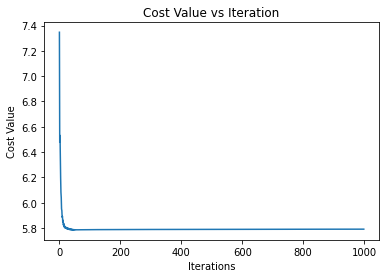

In [115]:
n.plot()

In [116]:
y_pred = n.predict(x_train)
print("The accuracy is ",n.accuracy(x_train,y_train,y_pred))

The accuracy is  2.0251012550627534


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
